## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
import itertools

from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

# 1. 試改變 monitor "Validation Accuracy" 並比較結果
monitor_list = ["val_loss", "val_accuracy"]

# 2. 調整 earlystop 的等待次數至 10, 25 並比較結果
patience_list = [10, 25]


results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor, patience in itertools.product(monitor_list, patience_list):
    earlystop = EarlyStopping(monitor=monitor, 
                              patience=patience, 
                              verbose=1
                              )
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = (f"monitor: {monitor}, patience: {patience}")
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 hidden_layer3 (Dense)       (None, 128)               3289

Epoch 1/50
49/49 [==============================] - 4s 74ms/step - loss: 2.2278 - accuracy: 0.2664 - val_loss: 2.1259 - val_accuracy: 0.2095
Epoch 2/50
49/49 [==============================] - 3s 68ms/step - loss: 1.7394 - accuracy: 0.3958 - val_loss: 1.9955 - val_accuracy: 0.2851
Epoch 3/50
49/49 [==============================] - 3s 65ms/step - loss: 1.6111 - accuracy: 0.4372 - val_loss: 1.8525 - val_accuracy: 0.3494
Epoch 4/50
49/49 [==============================] - 3s 67ms/step - loss: 1.5382 - accuracy: 0.4653 - val_loss: 1.7474 - val_accuracy: 0.3838
Epoch 5/50
49/49 [==============================] - 3s 65ms/step - loss: 1.4835 - accuracy: 0.4839 - val_loss: 1.6528 - val_accuracy: 0.4171
Epoch 6/50
49/49 [==============================] - 3s 64ms/step - loss: 1.4383 - accuracy: 0.5005 - val_loss: 1.6013 - val_accuracy: 0.4341
Epoch 7/50
49/49 [==============================] - 3s 63ms/step - loss: 1.4001 - accuracy: 0.5121 - val_loss: 1.5560 - val_accuracy: 0.4458
Epoch 8/50
49

Epoch 1/50
49/49 [==============================] - 4s 70ms/step - loss: 2.2259 - accuracy: 0.2698 - val_loss: 2.1445 - val_accuracy: 0.1791
Epoch 2/50
49/49 [==============================] - 3s 66ms/step - loss: 1.7402 - accuracy: 0.3955 - val_loss: 1.9737 - val_accuracy: 0.2934
Epoch 3/50
49/49 [==============================] - 3s 68ms/step - loss: 1.6103 - accuracy: 0.4368 - val_loss: 1.8309 - val_accuracy: 0.3613
Epoch 4/50
49/49 [==============================] - 3s 69ms/step - loss: 1.5364 - accuracy: 0.4615 - val_loss: 1.7115 - val_accuracy: 0.4039
Epoch 5/50
49/49 [==============================] - 3s 68ms/step - loss: 1.4797 - accuracy: 0.4822 - val_loss: 1.6354 - val_accuracy: 0.4348
Epoch 6/50
49/49 [==============================] - 3s 67ms/step - loss: 1.4325 - accuracy: 0.4977 - val_loss: 1.5968 - val_accuracy: 0.4425
Epoch 7/50
49/49 [==============================] - 3s 66ms/step - loss: 1.3923 - accuracy: 0.5122 - val_loss: 1.5634 - val_accuracy: 0.4472
Epoch 8/50
49

Epoch 2/50
49/49 [==============================] - 3s 63ms/step - loss: 1.7312 - accuracy: 0.3946 - val_loss: 1.9582 - val_accuracy: 0.2957
Epoch 3/50
49/49 [==============================] - 3s 61ms/step - loss: 1.6064 - accuracy: 0.4358 - val_loss: 1.8289 - val_accuracy: 0.3591
Epoch 4/50
49/49 [==============================] - 3s 64ms/step - loss: 1.5346 - accuracy: 0.4624 - val_loss: 1.7161 - val_accuracy: 0.4002
Epoch 5/50
49/49 [==============================] - 3s 64ms/step - loss: 1.4808 - accuracy: 0.4822 - val_loss: 1.6354 - val_accuracy: 0.4282
Epoch 6/50
49/49 [==============================] - 3s 65ms/step - loss: 1.4381 - accuracy: 0.4948 - val_loss: 1.5874 - val_accuracy: 0.4323
Epoch 7/50
49/49 [==============================] - 3s 64ms/step - loss: 1.3984 - accuracy: 0.5097 - val_loss: 1.5431 - val_accuracy: 0.4499
Epoch 8/50
49/49 [==============================] - 3s 64ms/step - loss: 1.3609 - accuracy: 0.5260 - val_loss: 1.5161 - val_accuracy: 0.4653
Epoch 9/50
49

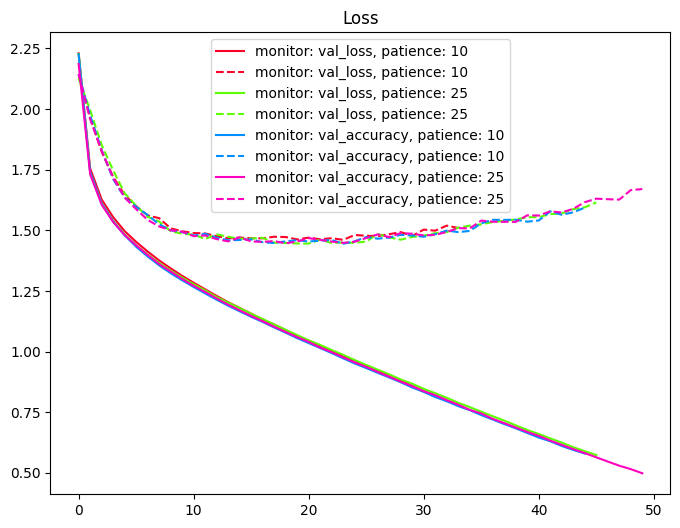

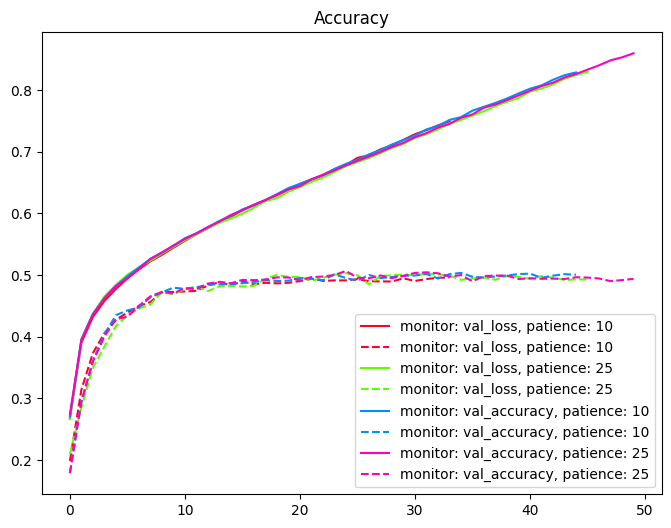

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
from matplotlib import cm as mplcm
from matplotlib import colors

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()